In [1]:
import gridworld
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def plot_mean_and_std(q_values_mc_list, q_values_sarsa_list):
    mean_mc = np.mean(q_values_mc_list, axis=0)
    std_mc = np.std(q_values_mc_list, axis=0)
    mean_sarsa = np.mean(q_values_sarsa_list, axis=0)
    std_sarsa = np.std(q_values_sarsa_list, axis=0)
    # Plot the mean for MC
    plt.plot(range(len(mean_mc)), mean_mc, label='Monte Carlo')
    # Show the standard deviation for MC
    plt.fill_between(range(len(mean_mc)), mean_mc - std_mc, mean_mc + std_mc, alpha=0.2)
    # Plot the mean for SARSA
    plt.plot(range(len(mean_sarsa)), mean_sarsa, label='SARSA')
    # Show the standard deviation for SARSA
    plt.fill_between(range(len(mean_sarsa)), mean_sarsa - std_sarsa, mean_sarsa + std_sarsa, alpha=0.2)
    plt.xlabel('Episodes')
    plt.ylabel('Q-value (mean & std)')
    plt.title('Bias and Variance')
    plt.legend()
    plt.show()

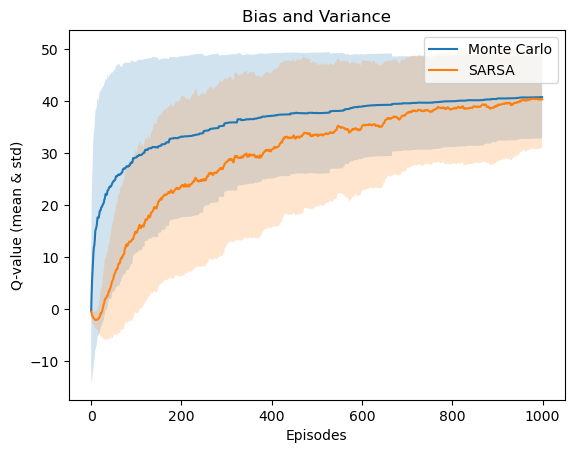

In [5]:
q_values_mc_list = []
q_values_sarsa_list = []
for i in range(100):
    q_values_mc, q_values_sarsa = gridworld.main()
    q_values_mc_list.append(q_values_mc)
    q_values_sarsa_list.append(q_values_sarsa)
plot_mean_and_std(q_values_mc_list, q_values_sarsa_list)

## Interpreting the results

In general, Monte Carlo control is a low-bias, high variance algorithm while 1-Step SARSA is high-bias, low variance. We can see this in the plot above.

Monte Carlo's mean approaches the true Q value pretty quickly, which can be due to its low bias nature. Also, its standard deviation starts very high and decreases over time. This is likely due to the high variance.

In contrast, SARSA's mean approaches the true Q value more slowly, and there is always some difference between the true Q value and the estimation, although it is significantly lower towards the end. Its standard deviation does not really change much, probably because it has a lower variance. The stable standard deviation can also signify the bias.